In [102]:
import json
with open('../data/real/medicine_validation_gt.json', 'r') as f:
    data = json.load(f)

In [103]:
data.keys()

dict_keys(['images', 'annotations', 'categories'])

In [104]:
print(len(data['images']))
data['images'][1]

10892


{'id': 1, 'file_name': 'medicine_47892.jpg', 'height': 921, 'width': 1341}

In [105]:
data['annotations'][1]

{'category_id': 1,
 'image_id': 0,
 'id': 1,
 'bbox': [54, 54, 95, 48],
 'area': 4560,
 'segmentation': [[54, 102, 54, 55, 149, 54, 149, 101]],
 'iscrowd': 0,
 'text_type': 1,
 'labels': '제품명'}

In [106]:
data['categories'][0]

{'id': 1, 'name': 'text'}

In [107]:
import pandas as pd
df = pd.DataFrame.from_dict(data['annotations'])
# 데이터 명세는 COCO 형식을 따른다.
# The segmentation format depends on 
# whether the instance represents a single object 
# (iscrowd=0 in which case polygons are used) 
# or a collection of objects
# (iscrowd=1 in which case RLE is used).
print(len(df))
df.head()

785567


,category_id,image_id,id,bbox,area,segmentation,iscrowd,text_type,labels
0,1,0,0,"[39, 72, 12, 15]",180,"[[39, 87, 39, 72, 51, 72, 51, 87]]",0,1,·
1,1,0,1,"[54, 54, 95, 48]",4560,"[[54, 102, 54, 55, 149, 54, 149, 101]]",0,1,제품명
2,1,0,2,"[154, 60, 11, 33]",363,"[[154, 93, 154, 60, 165, 60, 165, 93]]",0,1,:
3,1,0,3,"[184, 52, 181, 47]",8507,"[[184, 99, 184, 52, 365, 52, 365, 99]]",0,1,데일리플랜
4,1,0,4,"[376, 53, 98, 45]",4410,"[[376, 98, 376, 53, 474, 53, 474, 98]]",0,1,100억


In [108]:
# check duplicated value in 'id' column
df[df.duplicated(['id'])]

,category_id,image_id,id,bbox,area,segmentation,iscrowd,text_type,labels


In [109]:
# set index to 'id' column
df = df.set_index('id')
df.head()

,category_id,image_id,bbox,area,segmentation,iscrowd,text_type,labels
id,,,,,,,,
0,1,0,"[39, 72, 12, 15]",180,"[[39, 87, 39, 72, 51, 72, 51, 87]]",0,1,·
1,1,0,"[54, 54, 95, 48]",4560,"[[54, 102, 54, 55, 149, 54, 149, 101]]",0,1,제품명
2,1,0,"[154, 60, 11, 33]",363,"[[154, 93, 154, 60, 165, 60, 165, 93]]",0,1,:
3,1,0,"[184, 52, 181, 47]",8507,"[[184, 99, 184, 52, 365, 52, 365, 99]]",0,1,데일리플랜
4,1,0,"[376, 53, 98, 45]",4410,"[[376, 98, 376, 53, 474, 53, 474, 98]]",0,1,100억


In [110]:
df.describe()

,category_id,image_id,area,iscrowd,text_type
count,785567.0,785567.000000,7.855670e+05,785567.000000,785567.000000
mean,1.0,5504.751321,5.437227e+03,0.015076,3.860860
std,0.0,3123.835385,1.299419e+04,0.121854,1.317443
min,1.0,0.000000,2.100000e+01,0.000000,0.000000
25%,1.0,2818.000000,1.196000e+03,0.000000,3.000000
50%,1.0,5583.000000,2.592000e+03,0.000000,4.000000
75%,1.0,8209.000000,5.576000e+03,0.000000,5.000000
max,1.0,10891.000000,1.238895e+06,1.000000,9.000000


In [111]:
df_crowd = df[df['iscrowd'] == 1]
df_crowd.head()

,category_id,image_id,bbox,area,segmentation,iscrowd,text_type,labels
id,,,,,,,,
156,1,2,"[629, 978, 55, 118]",6490,"[[634, 1095, 629, 978, 679, 979, 684, 1096]]",1,0,
157,1,2,"[854, 966, 76, 143]",10868,"[[862, 1108, 854, 966, 921, 966, 930, 1109]]",1,0,
185,1,4,"[908, 135, 34, 34]",1156,"[[908, 135, 942, 135, 942, 169, 908, 169]]",1,0,
255,1,7,"[650, 266, 565, 16]",9040,"[[650, 266, 1215, 266, 1215, 282, 650, 282]]",1,0,
297,1,9,"[502, 273, 106, 6]",636,"[[502, 279, 502, 273, 608, 273, 608, 279]]",1,0,


In [112]:
print(len(df_crowd))
# check all 'labels' column is empty inside df_crowd
df_crowd[df_crowd['labels'] != ''].head()

11843


,category_id,image_id,bbox,area,segmentation,iscrowd,text_type,labels
id,,,,,,,,
7937,1,136,"[739, 1582, 223, 24]",5352,"[[739, 1606, 739, 1582, 962, 1582, 962, 1606]]",1,0,호박씨추출물동복합물섭취군
145752,1,2105,"[475, 415, 256, 89]",22784,"[[475, 504, 475, 415, 731, 415, 731, 504]]",1,0,플러스
145753,1,2105,"[715, 414, 41, 26]",1066,"[[715, 440, 715, 414, 756, 414, 756, 440]]",1,0,TM
168630,1,2433,"[215, 285, 8, 15]",120,"[[215, 300, 215, 285, 223, 285, 223, 300]]",1,0,S
174205,1,2513,"[982, 457, 35, 156]",5460,"[[982, 457, 1017, 457, 1017, 613, 982, 613]]",1,0,VITAMIN


In [113]:
# iscrowd 와 labels 컬럼에 해당하는 값의 존재 유무에 어떤 관계까 있는지를 확인한다.
# labels 컬럼에 값이 존재하지 않는 경우 iscrowd 컬럼의 값이 1인 경우가 대부분이다.
# 이러한 경우들은 학습에 반영하지 않으므로 don't care 이라고 부른다.
print(f'전체 데이터셋의 길이: {len(df)}개')
print(f"전체 데이터셋 중 텍스트 레이블링이 되어 있지 않은 것: {len(df[df['labels'] == ''])}개")
print(f"`iscrowd == 1` 인 데이터들 중 텍스트 레이블링이 되어 있지 않은 것 (don't care): {len(df_crowd[df_crowd['labels'] == ''])}개")

전체 데이터셋의 길이: 785567개
전체 데이터셋 중 텍스트 레이블링이 되어 있지 않은 것: 11882개
`iscrowd == 1` 인 데이터들 중 텍스트 레이블링이 되어 있지 않은 것 (don't care): 11813개


In [114]:
# iscrowd 컬럼의 값이 1임에도 labels 컬럼에 값이 존재하지 않는 경우가 실제로 존재한다.
label_is_empty = df[df['labels'] == '']
label_is_empty[label_is_empty['iscrowd'] == 0]

,category_id,image_id,bbox,area,segmentation,iscrowd,text_type,labels
id,,,,,,,,
21817,1,348,"[388, 697, 10, 14]",140,"[[388, 711, 388, 697, 398, 697, 398, 711]]",0,4,
27580,1,424,"[669, 840, 234, 31]",7254,"[[669, 840, 903, 840, 903, 871, 669, 871]]",0,1,
27581,1,424,"[914, 842, 54, 32]",1728,"[[914, 842, 968, 842, 968, 874, 914, 874]]",0,1,
82170,1,1222,"[883, 78, 145, 48]",6960,"[[883, 78, 1028, 78, 1028, 126, 883, 126]]",0,5,
136393,1,1963,"[357, 753, 233, 30]",6990,"[[357, 753, 590, 753, 590, 783, 357, 783]]",0,2,
...,...,...,...,...,...,...,...,...
766080,1,10618,"[1697, 87, 5, 22]",110,"[[1697, 87, 1702, 87, 1702, 109, 1697, 109]]",0,1,
766081,1,10618,"[1704, 84, 33, 27]",891,"[[1704, 84, 1737, 84, 1737, 111, 1704, 111]]",0,1,
766082,1,10618,"[667, 476, 50, 29]",1450,"[[667, 476, 717, 476, 717, 505, 667, 505]]",0,1,


In [115]:
# 해당 결측치 근처 레코드들의 상태를 확인해 보아도 단서를 얻을 수 없었다.
# 실제 이미지 없이는 왜 해당 영역에 대한 레이블이 비어 있는지 파악하기 힘들듯하다.
df[21817-4:21817+5]

,category_id,image_id,bbox,area,segmentation,iscrowd,text_type,labels
id,,,,,,,,
21813,1,348,"[1021, 696, 10, 13]",130,"[[1021, 709, 1021, 696, 1031, 696, 1031, 709]]",0,4,■
21814,1,348,"[967, 695, 10, 14]",140,"[[967, 709, 967, 695, 977, 695, 977, 709]]",0,4,■
21815,1,348,"[927, 695, 10, 14]",140,"[[927, 709, 927, 695, 937, 695, 937, 709]]",0,4,■
21816,1,348,"[580, 736, 13, 15]",195,"[[580, 751, 580, 736, 593, 736, 593, 751]]",0,5,■
21817,1,348,"[388, 697, 10, 14]",140,"[[388, 711, 388, 697, 398, 697, 398, 711]]",0,4,
21818,1,348,"[225, 738, 13, 14]",182,"[[225, 752, 225, 738, 238, 738, 238, 752]]",0,5,■
21819,1,348,"[225, 780, 12, 14]",168,"[[225, 794, 225, 780, 237, 780, 237, 794]]",0,3,■
21820,1,348,"[202, 825, 12, 13]",156,"[[202, 838, 202, 825, 214, 825, 214, 838]]",0,2,■
21821,1,348,"[117, 698, 10, 14]",140,"[[117, 712, 117, 698, 127, 698, 127, 712]]",0,4,■


In [116]:
# GT 데이터셋에 occlusion 이 발생한 polygon 은 존재하지 않는다.
# get length of each list in 'segmentation' column
df['segmentation'].apply(lambda x: len(x)).unique()

array([1])

In [117]:
# GT 데이터셋은 polygon 을 포함하는 bbox 의 좌상단을 기준으로 예쁘게 정렬이 되어 있음을 알 수 있다.
df_list = [df[df['image_id'] == image_id] for image_id in df['image_id'].unique()]
df_list[0].head()

,category_id,image_id,bbox,area,segmentation,iscrowd,text_type,labels
id,,,,,,,,
0,1,0,"[39, 72, 12, 15]",180,"[[39, 87, 39, 72, 51, 72, 51, 87]]",0,1,·
1,1,0,"[54, 54, 95, 48]",4560,"[[54, 102, 54, 55, 149, 54, 149, 101]]",0,1,제품명
2,1,0,"[154, 60, 11, 33]",363,"[[154, 93, 154, 60, 165, 60, 165, 93]]",0,1,:
3,1,0,"[184, 52, 181, 47]",8507,"[[184, 99, 184, 52, 365, 52, 365, 99]]",0,1,데일리플랜
4,1,0,"[376, 53, 98, 45]",4410,"[[376, 98, 376, 53, 474, 53, 474, 98]]",0,1,100억


In [118]:
# labels 컬럼에 들어 있는 값이 몇 개의 단어로 구성되어 있는지 확인한다.
print(df['labels'].apply(lambda x: len(x.split())).unique())
print(df['labels'].apply(lambda x: len(x.split(' '))).unique()) # 띄어쓰기로 구분되는 단어들
print(df['labels'].apply(lambda x: len(x.split(','))).unique()) # 콤마로 구분되는 단어들
print(df['labels'].apply(lambda x: len(x.split('.'))).unique()) # 온점으로 구분되는 단어들
print(df['labels'].apply(lambda x: len(x.split(', '))).unique()) # 콤마 띄어쓰기로 구분되는 단어들
print(df['labels'].apply(lambda x: len(x.split(',  '))).unique()) # 콤마 띄어쓰기 두 번으로 구분되는 단어들

[1 0 2 3]
[1 2 3 5 4]
[1 2 3 4 5]
[1 2 3 4 5 6]
[1 2]
[1]


In [119]:
# labels 컬럼에 들어 있는 값들 중 쉼표가 존재하는지 확인한다.
sep = ','
colon_in_labels = df['labels'].apply(lambda x: sep in x and len(x.split(sep)) > 3)
df[colon_in_labels].head()

,category_id,image_id,bbox,area,segmentation,iscrowd,text_type,labels
id,,,,,,,,
26076,1,406,"[79, 1042, 90, 43]",3870,"[[81, 1085, 79, 1046, 167, 1042, 169, 1081]]",0,2,"1,2,3),"
26488,1,411,"[485, 1367, 451, 60]",27060,"[[485, 1427, 485, 1367, 936, 1367, 936, 1427]]",0,2,"1,000,000,000CFU"
28341,1,434,"[488, 613, 248, 56]",13888,"[[488, 613, 736, 613, 736, 669, 488, 669]]",0,2,"8,000,000,000cfu"
30309,1,457,"[448, 1123, 377, 53]",19981,"[[448, 1176, 448, 1123, 825, 1123, 825, 1176]]",0,5,"5,000,000,000CFU"
32276,1,476,"[226, 809, 414, 52]",21528,"[[226, 861, 226, 810, 640, 809, 640, 861]]",0,2,"3,000,000,000CFU,"


In [120]:
sep = '.'
colon_in_labels = df['labels'].apply(lambda x: sep in x and len(x.split(sep)) > 3)
df[colon_in_labels].head()

,category_id,image_id,bbox,area,segmentation,iscrowd,text_type,labels
id,,,,,,,,
275,1,9,"[1605, 404, 188, 31]",5828,"[[1605, 435, 1605, 404, 1793, 404, 1793, 435]]",0,5,www.ilyang.co.kr
363,1,11,"[306, 830, 384, 34]",13056,"[[306, 864, 306, 830, 690, 830, 690, 864]]",0,5,www.hyundaipharm.co.kr
3166,1,47,"[1066, 1037, 191, 53]",10123,"[[1069, 1037, 1257, 1048, 1255, 1090, 1066, 10...",0,5,www.yuhan.co.kr
3606,1,59,"[72, 338, 256, 55]",14080,"[[75, 393, 72, 361, 325, 338, 328, 370]]",0,5,s://nedrug.mfds.go.kr)
3935,1,69,"[447, 1372, 311, 36]",11196,"[[447, 1372, 758, 1372, 757, 1408, 447, 1407]]",0,5,www.roche.co.kr


In [121]:
sep = ' '
colon_in_labels = df['labels'].apply(lambda x: sep in x and len(x.split(sep)) > 3)
df[colon_in_labels].head()

,category_id,image_id,bbox,area,segmentation,iscrowd,text_type,labels
id,,,,,,,,
122218,1,1763,"[485, 329, 35, 42]",1470,"[[487, 371, 485, 330, 518, 329, 520, 369]]",0,5,·
122220,1,1763,"[870, 319, 35, 30]",1050,"[[872, 349, 870, 321, 904, 319, 905, 348]]",0,5,·
122222,1,1763,"[1257, 296, 31, 41]",1271,"[[1259, 337, 1257, 297, 1286, 296, 1288, 336]]",0,5,·
144784,1,2092,"[1330, 907, 253, 42]",10626,"[[1330, 949, 1330, 908, 1583, 907, 1583, 949]]",0,5,알리코제약 ｜주 ｜
239472,1,3400,"[29, 407, 143, 39]",5577,"[[30, 409, 172, 407, 172, 444, 29, 446]]",0,5,[성 상]


In [122]:
from tqdm import tqdm
import shapely
import shapely.geometry

def sort_by_linear_ring(points):
    return [shapely.geometry.Point(point) for point in points]

def get_polygon(x1, y1, x2, y2, x3, y3, x4, y4):
    p1 = (x1, y1)
    p2 = (x2, y2)
    p3 = (x3, y3)
    p4 = (x4, y4)
    p1, p2, p3, p4 = sort_by_linear_ring([p1, p2, p3, p4])
    return shapely.geometry.Polygon([p1, p2, p3, p4])

# GT 데이터셋에 occlusion 이 발생한 polygon 은 존재하지 않는다는 것을 앞서 확인했다.
# 잘못 레이블링된 polygon 이 존재할 수 있다. 이것들을 검사해 본다.
# 작업을 마치는 데 몇 분 정도가 소요된다.
for idx, segmentation in enumerate(tqdm(df['segmentation'])):
    x1, y1, x2, y2, x3, y3, x4, y4 = segmentation[0]
    try:
        polygon = get_polygon(x1, y1, x2, y2, x3, y3, x4, y4)
        assert polygon.area != 0
    except:
        print(f'index: {idx}, 잘못 레이블링된(linear ring 을 형성할 수 없는) polygon 이 존재한다.')
# GT 데이터셋에 잘못 레이블링된 polygon 도 없다는 것을 확인했다.

100%|██████████| 785567/785567 [01:26<00:00, 9079.30it/s]


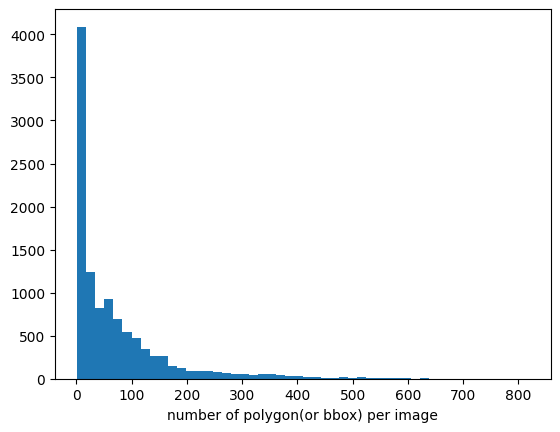

In [123]:
# group by image_id and count number of records of each group
import matplotlib.pyplot as plt
n_polygon_by_images = df.groupby('image_id').count().bbox.sort_values()
plt.hist(n_polygon_by_images, bins=50)
plt.xlabel('number of polygon(or bbox) per image')
plt.show()

In [124]:
n_polygon_by_images.describe()
# 이미지의 75%가 100개도 안되는 polygon(or bbox) 만을 가지고 있다.

count    10892.000000
mean        72.123302
std         93.413128
min          2.000000
25%         11.000000
50%         36.000000
75%         95.000000
max        818.000000
Name: bbox, dtype: float64

In [125]:
import numpy as np
a = np.array([[1,3], [2,4], [3,6]])
b = np.array([[0, 1], [0,1 ], [0,1]])
np.sum(a*b, axis=1)

array([3, 4, 6])

In [143]:
import numpy as np
def fn(x):
    x = np.array(x[0])
    p1 = x[0:2]
    p2 = x[2:4]
    p3 = x[4:6]
    p4 = x[6:8]
    p12 = p2 - p1
    p23 = p3 - p2
    p34 = p4 - p3
    p41 = p1 - p4
    v1 = np.array([p12, p23, p34, p41])
    v2 = np.array([p23, p34, p41, p12])
    v1_norm = np.linalg.norm(v1, axis=1, ord=2)
    v2_norm = np.linalg.norm(v2, axis=1, ord=2)
    cos_theta = np.sum(v1 * v2, axis=1) / (v1_norm * v2_norm)
    theta = np.arccos(cos_theta)
    if np.sum(theta) >= 2 * np.pi - 0.001 * np.pi:
        return True
    else:
        return False
df['is_convex'] = df['segmentation'].apply(fn)

In [145]:
df[df['is_convex'] == True]

,category_id,image_id,bbox,area,segmentation,iscrowd,text_type,labels,is_convex
id,,,,,,,,,
0,1,0,"[39, 72, 12, 15]",180,"[[39, 87, 39, 72, 51, 72, 51, 87]]",0,1,·,True
1,1,0,"[54, 54, 95, 48]",4560,"[[54, 102, 54, 55, 149, 54, 149, 101]]",0,1,제품명,True
2,1,0,"[154, 60, 11, 33]",363,"[[154, 93, 154, 60, 165, 60, 165, 93]]",0,1,:,True
3,1,0,"[184, 52, 181, 47]",8507,"[[184, 99, 184, 52, 365, 52, 365, 99]]",0,1,데일리플랜,True
4,1,0,"[376, 53, 98, 45]",4410,"[[376, 98, 376, 53, 474, 53, 474, 98]]",0,1,100억,True
...,...,...,...,...,...,...,...,...,...
785562,1,10891,"[423, 310, 6, 26]",156,"[[423, 336, 423, 310, 429, 310, 429, 336]]",0,2,:,True
785563,1,10891,"[554, 158, 29, 39]",1131,"[[554, 197, 554, 158, 583, 158, 583, 197]]",0,2,중,True
785564,1,10891,"[587, 174, 20, 6]",120,"[[587, 180, 587, 174, 607, 174, 607, 180]]",0,2,-,True


In [147]:
df[df['is_convex'] == False]

,category_id,image_id,bbox,area,segmentation,iscrowd,text_type,labels,is_convex
id,,,,,,,,,


In [150]:
from matplotlib.patches import Polygon
try:
    image_id = df[df['is_convex'] == False]['image_id'].values[0]
    polygon = df[df['is_convex'] == False]['segmentatio|n'].values[0]
    w = data['images'][int(image_id)]['width']
    h = data['images'][int(image_id)]['height']
    polygon = np.array(polygon).reshape(4, 2)
except IndexError:
    print('Concave 한 polygon 이 존재하지 않는다.')
else:
    print('Concave 한 polygon 이 존재한다.')
    print(polygon)
    plt.figure()
    plt.gca().add_patch(Polygon(polygon, fill=True, edgecolor='red'))
    plt.ylim(0,h)
    plt.xlim(0,w)
    plt.show()

Concave 한 polygon 이 존재하지 않는다.
